# Importing  Data

In [54]:
import pandas as pd
df = pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [55]:
df=df.drop_duplicates(subset=['description','company_profile', 'requirements', 'benefits'])
len(df[df['fraudulent']==1])/len(df)

0.04420317952694843

In [56]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['work', 'project', 'career', 'client', 'product', 
                         'company', 'support', 'need', 'manager', 'business', 'customer', 'team', 'provide'])
# custom_stopwords.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# EDA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


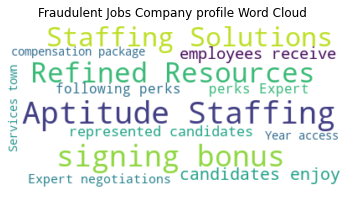

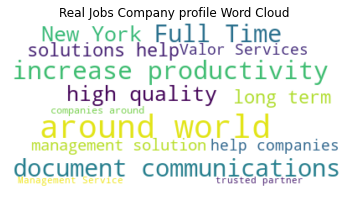

In [57]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
% matplotlib inline
company_profile = ""
for row in df[df['fraudulent']==1].itertuples(index=False):
  company_profile=company_profile+str(row[5])

# Create and generate a word cloud image:
wordcloud = WordCloud(min_font_size=10, 
                      background_color="white", 
                      stopwords=custom_stopwords
                      ).generate(company_profile)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Fraudulent Jobs Company profile Word Cloud ")
plt.show()

realcompany_profile = ""
for row in df[df['fraudulent']==0].itertuples(index=False):
  realcompany_profile=realcompany_profile+str(row[5])

# Create and generate a word cloud image:
wordcloud = WordCloud(min_font_size=10, 
                      background_color="white", 
                      stopwords=custom_stopwords
                      ).generate(realcompany_profile)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Real Jobs Company profile Word Cloud")
plt.axis("off")
plt.show()

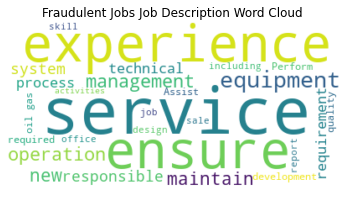

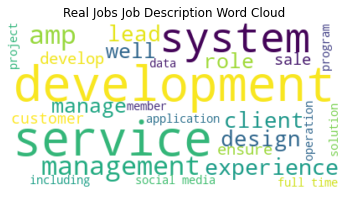

In [58]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
company_profile = ""
for row in df[df['fraudulent']==1].itertuples(index=False):
  company_profile=company_profile+str(row[6])

# Create and generate a word cloud image:
wordcloud = WordCloud(min_font_size=10, 
                      background_color="white", 
                      stopwords=custom_stopwords
                      ).generate(company_profile)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Fraudulent Jobs Job Description Word Cloud ")
plt.show()

realcompany_profile = ""
for row in df[df['fraudulent']==0].itertuples(index=False):
  realcompany_profile=realcompany_profile+str(row[6])

# Create and generate a word cloud image:
wordcloud = WordCloud(min_font_size=10, 
                      background_color="white", 
                      stopwords=custom_stopwords
                      ).generate(realcompany_profile)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Real Jobs Job Description Word Cloud")
plt.axis("off")
plt.show()

In [59]:
#do this for requirements as well

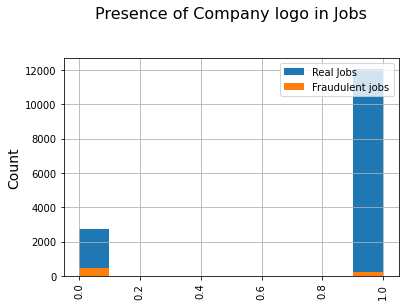

In [60]:
df[df['fraudulent']==0]['has_company_logo'].hist(xrot=90, label="Real Jobs")
df[df['fraudulent']==1]['has_company_logo'].hist(xrot=90, label="Fraudulent jobs")
plt.title("Presence of Company logo in Jobs", loc="center", pad=40, size= 16)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.show()

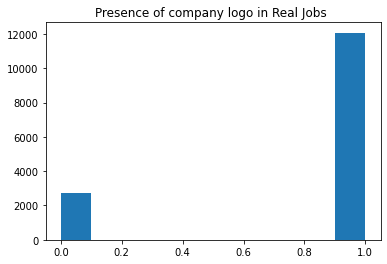

In [61]:
plt.hist(df[df['fraudulent']==0]['has_company_logo'])
plt.title("Presence of company logo in Real Jobs ")
plt.show()

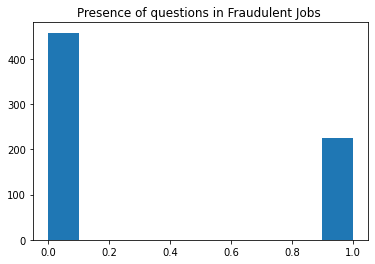

In [62]:
plt.hist(df[df['fraudulent']==1]['has_questions'])
plt.title("Presence of questions in Fraudulent Jobs ")
plt.show()

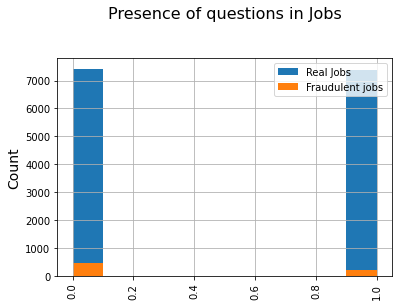

In [63]:
# df.hist(by='fraudulent', column='has_questions')
# plt.title("Presence of Questions in Real(left) & Faudulent(right) Jobs ", loc="right", pad=40)
# plt.show()
df[df['fraudulent']==0]['has_questions'].hist(xrot=90, label="Real Jobs")
df[df['fraudulent']==1]['has_questions'].hist(xrot=90, label="Fraudulent jobs")
plt.title("Presence of questions in Jobs", loc="center", pad=40, size=16)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.show()

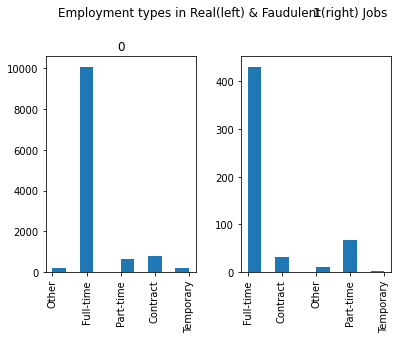

In [64]:
df.hist(by='fraudulent', column='employment_type')
plt.title("Employment types in Real(left) & Faudulent(right) Jobs ", loc="right", pad=40)
plt.show()
# df[df['fraudulent']==0]['employment_type'].hist(figsize=(5,5), xrot=90, label="Real Jobs")
# df[df['fraudulent']==1]['employment_type'].hist(figsize=(5, 5), xrot=90, label="Fraudulent jobs")
# plt.title("Employment type in Jobs", loc="center", pad=40)
# plt.ylabel("Count", size=14)
# plt.legend(loc='upper right')
# plt.show()

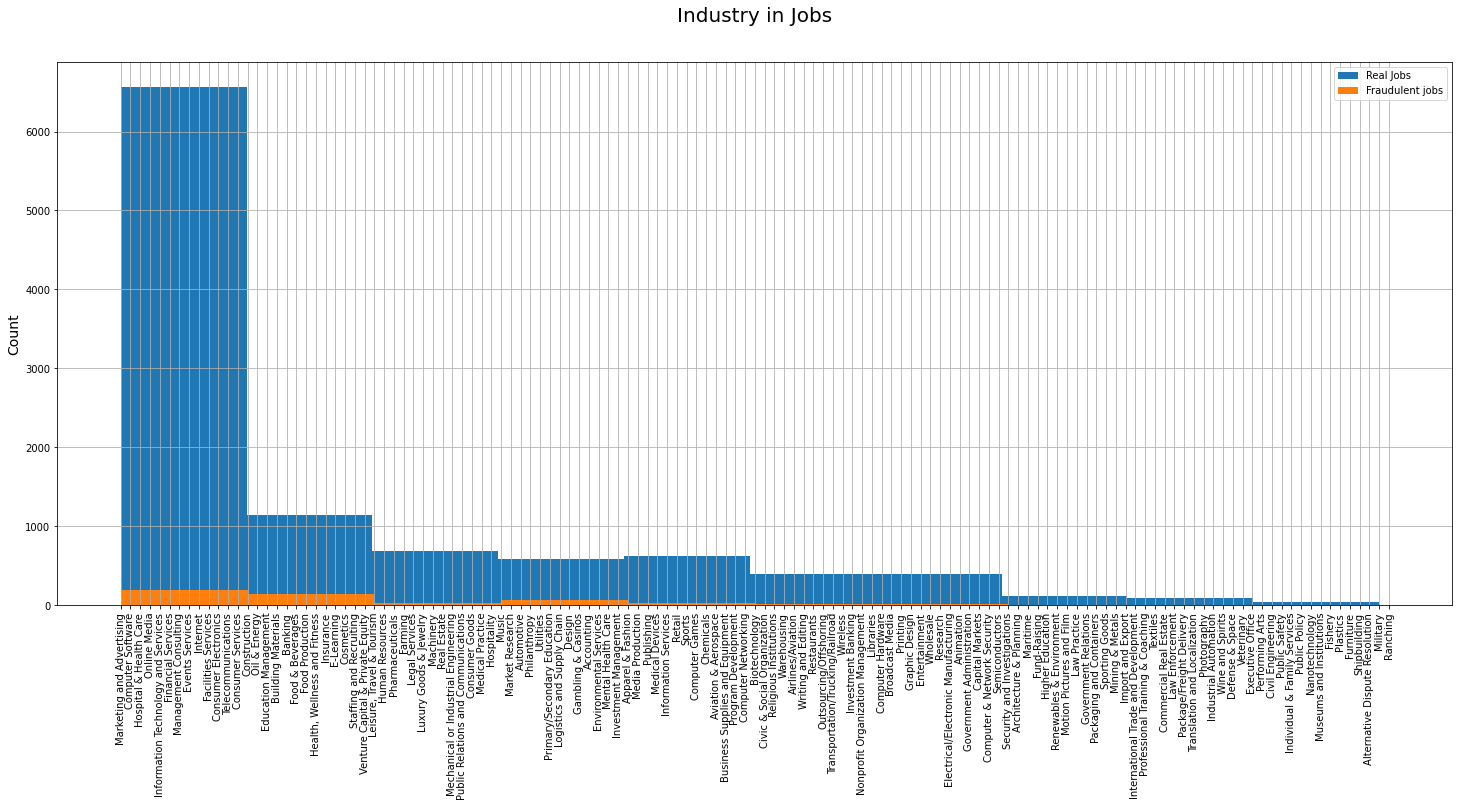

In [65]:
df[df['fraudulent']==0]['industry'].hist(figsize=(25, 10), xrot=90, label="Real Jobs")
df[df['fraudulent']==1]['industry'].hist(figsize=(25, 10), xrot=90, label="Fraudulent jobs")
plt.title("Industry in Jobs", loc="center", pad=40, size=20)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.show()

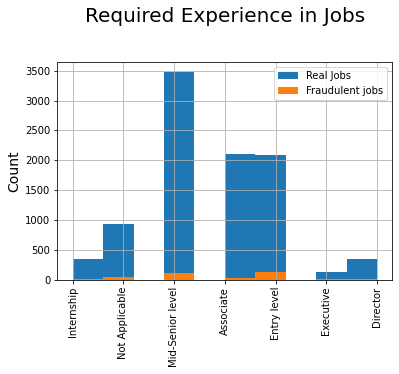

In [66]:
df[df['fraudulent']==0]['required_experience'].hist( xrot=90, label="Real Jobs")
df[df['fraudulent']==1]['required_experience'].hist( xrot=90, label="Fraudulent jobs")
plt.title("Required Experience in Jobs", loc="center", pad=40, size=20)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.show()

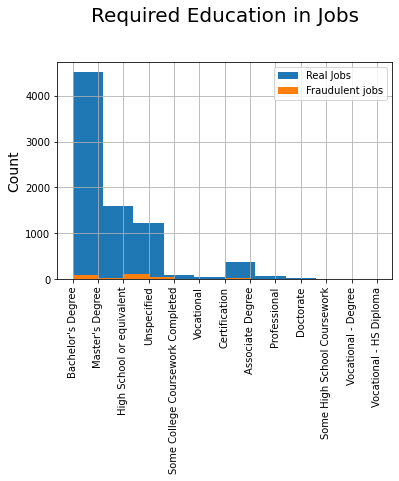

In [67]:
df[df['fraudulent']==0]['required_education'].hist( xrot=90, label="Real Jobs")
df[df['fraudulent']==1]['required_education'].hist( xrot=90, label="Fraudulent jobs")
plt.title("Required Education in Jobs", loc="center", pad=40, size=20)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
plt.show()

# Pre-Processing

In [68]:
df['description'].fillna(" ", inplace = True)
df['company_profile'].fillna(" ", inplace = True)
df['benefits'].fillna(" ", inplace = True)
df['requirements'].fillna(" ", inplace = True)

In [69]:
df_0=df[df['fraudulent']==0]
df_1=df[df['fraudulent']==1]
df_0=df_0.sample(450, random_state=0)
df_1=df_1.sample(450, random_state=0)
df_new = pd.concat([df_0, df_1])

In [70]:
X=df_new['description']+" "+df_new['company_profile'] + " "+ df_new['requirements']+ " "+ df_new['benefits']
y=df_new['fraudulent']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#Vectorizer

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# several commonly used vectorizer setting

#  unigram boolean vectorizer, set minimum document frequency to 5
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words=custom_stopwords)

#  unigram term frequency vectorizer, set minimum document frequency to 5
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words=custom_stopwords)

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words=custom_stopwords)

#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words=custom_stopwords)

# Multinomial Naive Bayes


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
nb_clf_pipe = Pipeline([('vect', gram12_count_vectorizer),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

nb_clf_pipe = Pipeline([('vect', unigram_count_vectorizer),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

nb_clf_pipe = Pipeline([('vect', unigram_bool_vectorizer),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

nb_clf_pipe = Pipeline([('vect', unigram_tfidf_vectorizer),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

0.8166666666666667
0.8240740740740741
0.8481481481481481
0.837037037037037


In [22]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,classification_report
from sklearn.naive_bayes import MultinomialNB
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)
X_test_vec = unigram_tfidf_vectorizer.transform(X_test)
nb_clf= MultinomialNB()
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       179
           1       0.85      0.87      0.86       181

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360

[[151  28]
 [ 24 157]]


In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }
mnb=MultinomialNB()
multinomial_nb_grid = GridSearchCV(mnb, param_grid=params, 
                                   n_jobs=-1, cv=5, verbose=5)
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)
X_test_vec = unigram_tfidf_vectorizer.transform(X_test)
multinomial_nb_grid.fit(X_train_vec, y_train)
multinomial_nb_best = multinomial_nb_grid.best_estimator_
print(multinomial_nb_best)
y_pred = multinomial_nb_best.fit(X_train_vec, y_train).predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
MultinomialNB(alpha=0.01)
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       179
           1       0.86      0.83      0.84       181

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360

[[154  25]
 [ 31 150]]


# Random Forest

In [23]:
# Random Forest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
nb_clf_pipe = Pipeline([('vect', unigram_bool_vectorizer),('nb', RandomForestClassifier())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

nb_clf_pipe = Pipeline([('vect', unigram_count_vectorizer),('nb', RandomForestClassifier())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

nb_clf_pipe = Pipeline([('vect', gram12_count_vectorizer),('nb', RandomForestClassifier())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

nb_clf_pipe = Pipeline([('vect', unigram_tfidf_vectorizer),('nb', RandomForestClassifier())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

0.875925925925926
0.874074074074074
0.875925925925926
0.874074074074074


In [24]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,classification_report
X_train_vec = unigram_bool_vectorizer.fit_transform(X_train)
X_test_vec = unigram_bool_vectorizer.transform(X_test)
nb_clf= RandomForestClassifier()
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       179
           1       0.86      0.86      0.86       181

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360

[[154  25]
 [ 26 155]]


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [30, 200],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [3,10],
    'n_estimators': [100, 300, 900]
}
target_names = [0,1]
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train_vec, y_train)
# from timeit import default_timer as timer
# start = timer()
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       179
           1       0.84      0.89      0.86       181

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360

[[148  31]
 [ 20 161]]


# SVM

In [28]:
# Random Forest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
nb_clf_pipe = Pipeline([('vect', unigram_bool_vectorizer),('nb', SVC())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

nb_clf_pipe = Pipeline([('vect', unigram_count_vectorizer),('nb', SVC())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

nb_clf_pipe = Pipeline([('vect', gram12_count_vectorizer),('nb', SVC())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

nb_clf_pipe = Pipeline([('vect', unigram_tfidf_vectorizer),('nb', SVC())])
scores = cross_val_score(nb_clf_pipe, X_train, y_train, cv=5)
avg=sum(scores)/len(scores)
print(avg)

0.8685185185185185
0.8462962962962963
0.8425925925925926
0.8851851851851851


In [29]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,classification_report
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)
X_test_vec = unigram_tfidf_vectorizer.transform(X_test)
nb_clf= SVC()
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       179
           1       0.88      0.90      0.89       181

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360

[[157  22]
 [ 18 163]]


In [31]:
from sklearn.svm import SVC
import multiprocessing
param_grid = {
    'kernel': ['linear','rbf', 'poly', 'sigmoid'],
    'C': [1,10],
    'degree': [2,3,4],
    'gamma': [0.1, 0.01, 0.001]
}

svc_vec_gs = GridSearchCV(estimator=SVC() , param_grid=param_grid , cv=10, n_jobs=multiprocessing.cpu_count(), verbose=1)

svc_vec_gs.fit(X_train_vec, y_train)

svc_vec_best = svc_vec_gs.best_estimator_
svc_vec_best.fit(X_train_vec,y_train)
y_pred = svc_vec_best.predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

Fitting 10 folds for each of 3 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       0.90      0.82      0.85       179
           1       0.83      0.91      0.87       181

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360

[[146  33]
 [ 17 164]]


              precision    recall  f1-score   support

           0       0.87      0.84      0.85       179
           1       0.84      0.87      0.86       181

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



# BERT

In [ ]:
# I have to restart runtime after running this command
!pip install awscli --ignore-installed six

     |████████████████████████████████| 3.8 MB 12.5 MB/s 
     |████████████████████████████████| 636 kB 66.5 MB/s 
  Using cached s3transfer-0.5.0-py3-none-any.whl (79 kB)
     |████████████████████████████████| 547 kB 61.8 MB/s 
  Using cached botocore-1.23.20-py3-none-any.whl (8.4 MB)
  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
     |████████████████████████████████| 247 kB 83.5 MB/s 
     |████████████████████████████████| 77 kB 4.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
album

In [ ]:
# fine tune a BERT base uncased model
# since this wrapper has included vectorization using word embedding, no need to vectorize like in LinearSVC
# first the pre-trained BERT model will be loaded in
# then the training starts. 90% examples will be used as training examples and the other 10% as validation (parameter tuning)
# default setting is 3 epoch. Each epoch takes in some training data
!git clone -b master https://github.com/charles9n/bert-sklearn
!cd bert-sklearn; pip install .

from bert_sklearn import BertClassifier
model = BertClassifier()         # text/text pair classification
print(model)
model.fit(X_train, y_train)
model.save('bert-sentiment.model')
model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
# y_pred = svm_clf.predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = [0,1]
print(classification_report(y_test, y_pred, target_names=target_names))

KeyboardInterrupt: ignored

# Cleanig up the Text column

In [32]:
import re
def cleanSentence(sent):
  new_string=re.sub('[^a-zA-Z]',' ',sent)

  cleaned_string=re.sub('\s+',' ',new_string)

  return cleaned_string

In [33]:
df_new["AllText"] = df_new['description']+" "+df_new['company_profile'] + " "+ df_new['requirements']+ " "+ df_new['benefits']

df_new['CleanText']=df_new['AllText'].apply(
    lambda row: cleanSentence(row))

In [34]:
X=df_new['CleanText']
y=df_new['fraudulent']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


# cleaned MNB

In [36]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,classification_report
from sklearn.naive_bayes import MultinomialNB
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)
X_test_vec = unigram_tfidf_vectorizer.transform(X_test)
nb_clf= MultinomialNB()
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       179
           1       0.84      0.86      0.85       181

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }
mnb=MultinomialNB()
multinomial_nb_grid = GridSearchCV(mnb, param_grid=params, 
                                   n_jobs=-1, cv=5, verbose=5)
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)
X_test_vec = unigram_tfidf_vectorizer.transform(X_test)
multinomial_nb_grid.fit(X_train_vec, y_train)
multinomial_nb_best = multinomial_nb_grid.best_estimator_
print(multinomial_nb_best)
y_pred = multinomial_nb_best.fit(X_train_vec, y_train).predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
MultinomialNB(alpha=0.01)
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       179
           1       0.85      0.83      0.84       181

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



## Error Analysis

In [ ]:
from pprint import pprint
err_cnt = 0
j=0
for i in y_test.keys():
    # print(i)
    if(y_test[i]==1 and y_pred[j]==0):
        pprint(X_test[i])
        print()
        err_cnt = err_cnt+1
    j=j+1
print("errors:", err_cnt)

errors: 30


#cleaned RF

In [38]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,classification_report
from sklearn.ensemble import RandomForestClassifier
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)
X_test_vec = unigram_tfidf_vectorizer.transform(X_test)
nb_clf= RandomForestClassifier()
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       179
           1       0.85      0.87      0.86       181

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360

[[152  27]
 [ 24 157]]


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [30, 200],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [3,10],
    'n_estimators': [100, 300, 900]
}
target_names = [0,1]
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train_vec, y_train)
# from timeit import default_timer as timer
# start = timer()
best_model_rf = grid_search.best_estimator_
print(best_model_rf)
y_pred = best_model_rf.predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       179
           1       0.86      0.86      0.86       181

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360

[[153  26]
 [ 25 156]]


## Error Analysis

In [ ]:
from pprint import pprint
err_cnt = 0
j=0
for i in y_test.keys():
    # print(i)
    if(y_test[i]==1 and y_pred[j]==0):
        pprint(X_test[i])
        print()
        err_cnt = err_cnt+1
    j=j+1
print("errors:", err_cnt)

errors: 30


# cleaned SVM

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score,recall_score,classification_report
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)
X_test_vec = unigram_tfidf_vectorizer.transform(X_test)
nb_clf= SVC()
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       179
           1       0.88      0.90      0.89       181

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360



In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import multiprocessing
param_grid = {
    'kernel': ['linear','rbf', 'poly', 'sigmoid'],
    'C': [1,10],
    'degree': [2,3,4],
    'gamma': [0.1, 0.01, 0.001]
}

svc_vec_gs = GridSearchCV(estimator=SVC() , 
                          param_grid=param_grid , cv=5, 
                          n_jobs=multiprocessing.cpu_count(), verbose=1, scoring="accuracy")

svc_vec_gs.fit(X_train_vec, y_train)

svc_vec_best = svc_vec_gs.best_estimator_
svc_vec_best.fit(X_train_vec,y_train)
y_pred = svc_vec_best.predict(X_test_vec)
print(classification_report(y_test, y_pred, labels=[0,1]))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       179
           1       0.83      0.89      0.86       181

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360

[[146  33]
 [ 20 161]]


## Error Analysis

In [ ]:
from pprint import pprint
err_cnt = 0
j=0
for i in y_test.keys():
    # print(i)
    if(y_test[i]==1 and y_pred[j]==0):
        pprint(X_test[i])
        print()
        err_cnt = err_cnt+1
    j=j+1
print("errors:", err_cnt)

errors: 30


# Cleaned BERT

In [ ]:
# fine tune a BERT base uncased model
# since this wrapper has included vectorization using word embedding, no need to vectorize like in LinearSVC
# first the pre-trained BERT model will be loaded in
# then the training starts. 90% examples will be used as training examples and the other 10% as validation (parameter tuning)
# default setting is 3 epoch. Each epoch takes in some training data
# !pip install awscli --ignore-installed six
# !git clone -b master https://github.com/charles9n/bert-sklearn
# !cd bert-sklearn; pip install .
import time
from bert_sklearn import BertClassifier
model = BertClassifier()         # text/text pair classification
print(model)
tic = time.perf_counter()
model.fit(X_train, y_train)
toc = time.perf_counter()
print(f"Trained SVM in in {toc - tic:0.4f} seconds")
model.save('bert-sentiment.model')
model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred, labels=[0,1])
print(cm)
print()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0','1']))

fatal: destination path 'bert-sklearn' already exists and is not an empty directory.
Processing /content/bert-sklearn
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for bert-sklearn: filename=bert_sklearn-0.3.1-py3-none-any.whl size=54247 sha256=b7c319d3353eb666c110975694cde19029cded506ec5f2cd83d436ad04c88297
  Stored in directory: /root/.cache/pip/wheels/e7/d4/73/12b2219a5cd4cd8c7acfd72204603ce34b6d2e4f620b205a80
Successfully built bert-sklearn
  Attempting uninstall: bert-sklearn
    Found existing installation: bert-sklearn 0.3.1
    Uninstalling bert-sklearn-0.3.1:
      Successfully uninstalled bert-sklearn-0.3.1
Building 

100%|██████████| 231508/231508 [00:00<00:00, 1624882.12B/s]


Loading bert-base-uncased model...


100%|██████████| 433/433 [00:00<00:00, 283682.23B/s]


Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 486, validation data size: 54



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training  :   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/bert_sklearn/model/pytorch_pretrained/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1050.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Validating:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.6937, Val loss: 0.6849, Val accy: 53.70%



Training  :   0%|          | 0/16 [00:00<?, ?it/s]

Validating:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.5463, Val loss: 0.5028, Val accy: 74.07%



Training  :   0%|          | 0/16 [00:00<?, ?it/s]

Validating:   0%|          | 0/7 [00:00<?, ?it/s]


Epoch 3, Train loss: 0.3310, Val loss: 0.4101, Val accy: 77.78%

Trained SVM in in 114.1921 seconds


Testing:   0%|          | 0/45 [00:00<?, ?it/s]


Loss: 0.4484, Accuracy: 81.11%


Predicting:   0%|          | 0/45 [00:00<?, ?it/s]

[[149  30]
 [ 38 143]]

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       179
           1       0.83      0.79      0.81       181

    accuracy                           0.81       360
   macro avg       0.81      0.81      0.81       360
weighted avg       0.81      0.81      0.81       360



In [ ]:
from pprint import pprint
err_cnt = 0
j=0
for i in y_test.keys():
    # print(i)
    if(y_test[i]==1 and y_pred[j]==0):
        pprint(X_test[i])
        print()
        err_cnt = err_cnt+1
    j=j+1
print("errors:", err_cnt)

NameError: ignored

# Ensemble Models to use numerical features along with text model. 

I experimented with a possible way to use binary features as discussed in the paper (to capture length of the text columns, capture presence of luring phrases in sentences, etc)

In my experiemnt I developed a model using categorical columns such as:
has_company_logo: If the company has a logo, has_questions: If the company has screening questions, CleanText_length: length of the text data,
employment_type: Full-time/Part-time, required_experience: Required Experience for the job
required_education:Required Experience for the job

I take the average of predicted probability of this model along with the probability from the model using text features.

It didn't improve scores much and I think adding better categorical features here would be essential.

In [44]:
svm_best =SVC(probability=True)
X_train_vec = unigram_tfidf_vectorizer.fit_transform(X_train)
X_test_vec = unigram_tfidf_vectorizer.transform(X_test)
svm_predict_prob = svm_best.fit(X_train_vec, y_train).predict_proba(X_test_vec)

In [45]:
X=df_new[['CleanText', 'has_company_logo', 'has_questions']]
y=df_new['fraudulent']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [47]:
from sklearn.svm import LinearSVC, SVC
import time
from sklearn.metrics import confusion_matrix, precision_score,recall_score,classification_report
svm_best =SVC(probability=True)
tic = time.perf_counter()
y_pred = svm_best.fit(X_train[['has_company_logo', 'has_questions']], y_train).predict_proba(X_test[['has_company_logo', 'has_questions']])

In [48]:
ensemple_prediction = []
for i in range(len(svm_predict_prob)):
  avg_0 = (svm_predict_prob[i][0] + y_pred[i][0])/2
  avg_1 = (svm_predict_prob[i][1] + y_pred[i][1])/2
  if avg_0 >= avg_1:
    ensemple_prediction.append(0)
  else:
    ensemple_prediction.append(1)

In [49]:
print(classification_report(y_test, ensemple_prediction, labels=[0,1]))
print(confusion_matrix(y_test, ensemple_prediction, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       179
           1       0.87      0.90      0.88       181

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.88      0.88      0.88       360

[[154  25]
 [ 18 163]]


In [50]:
def lenCol(a):
  return len(a)

df_new['CleanText_length']=df_new['CleanText'].apply(
    lambda row: lenCol(row))

In [51]:
cols = ['has_company_logo', 'has_questions', 'CleanText_length',
        'employment_type', 'required_experience', 'required_education', 'fraudulent']
categorical_cols = ['has_company_logo', 'has_questions', 'employment_type',
                    'required_experience', 'required_education']

df_subset=df_new[cols]
for col in cols:
  df_subset[col].fillna(" ", inplace = True)
X=df_subset[categorical_cols]
X = pd.get_dummies(X, columns = categorical_cols)
X= pd.concat([X, df_subset['CleanText_length']], axis=1)
y=df_subset['fraudulent']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
from sklearn.svm import LinearSVC, SVC
svm_best =SVC(probability=True)
tic = time.perf_counter()
y_pred = svm_best.fit(X_train, y_train).predict_proba(X_test)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
ensemple_prediction = []
for i in range(len(svm_predict_prob)):
  avg_0 = (svm_predict_prob[i][0] + y_pred[i][0])/2
  avg_1 = (svm_predict_prob[i][1] + y_pred[i][1])/2
  if avg_0 >= avg_1:
    ensemple_prediction.append(0)
  else:
    ensemple_prediction.append(1)

print(classification_report(y_test, ensemple_prediction, labels=[0,1]))
print(confusion_matrix(y_test, ensemple_prediction, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       179
           1       0.86      0.89      0.87       181

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360

[[152  27]
 [ 20 161]]
